In [1]:
import os
import time

from tp1.manejo_archivos_analisis import leer_archivo_analisis
from tp1.tiempo_optimo import tiempo_optimo

directorio = 'data/'  
archivos = os.listdir(directorio)
archivos = sorted(archivos, key=lambda archivo: int(archivo.split(' ')[0]))
resultado = []


for archivo in archivos:
    print("Trabajando con archivo: " + archivo)
    tiempos_analisis = leer_archivo_analisis(directorio + archivo)
    
    tiempo_inicio = time.perf_counter()
    tiempo_optimo(tiempos_analisis)
    tiempo_fin = time.perf_counter()

    
    tiempo_ejecucion = (tiempo_fin - tiempo_inicio) * 1000
    medicion = (len(tiempos_analisis), round(tiempo_ejecucion, 2))
    print(f"N={medicion[0]} T={medicion[1]} ms")
    resultado.append(medicion)
print(resultado)

Trabajando con archivo: 8000 elementos.txt
N=8000 T=1.98 ms
Trabajando con archivo: 16000 elementos.txt
N=16000 T=4.09 ms
Trabajando con archivo: 24000 elementos.txt
N=24000 T=6.85 ms
Trabajando con archivo: 32000 elementos.txt
N=32000 T=9.37 ms
Trabajando con archivo: 40000 elementos.txt
N=40000 T=12.81 ms
Trabajando con archivo: 48000 elementos.txt
N=48000 T=15.65 ms
Trabajando con archivo: 56000 elementos.txt
N=56000 T=19.51 ms
Trabajando con archivo: 64000 elementos.txt
N=64000 T=22.81 ms
Trabajando con archivo: 72000 elementos.txt
N=72000 T=25.7 ms
Trabajando con archivo: 80000 elementos.txt
N=80000 T=29.5 ms
Trabajando con archivo: 88000 elementos.txt
N=88000 T=33.12 ms
Trabajando con archivo: 96000 elementos.txt
N=96000 T=37.31 ms
Trabajando con archivo: 104000 elementos.txt
N=104000 T=40.16 ms
Trabajando con archivo: 112000 elementos.txt
N=112000 T=43.83 ms
Trabajando con archivo: 120000 elementos.txt
N=120000 T=51.14 ms
Trabajando con archivo: 128000 elementos.txt
N=128000 T=5

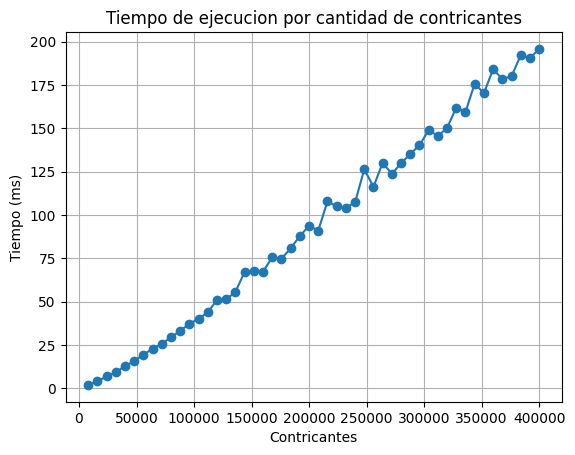

In [2]:
import matplotlib.pyplot as plt

contricantes = [analisis[0] for analisis in resultado]
tiempos = [analisis[1] for analisis in resultado]

plt.plot(contricantes, tiempos, label= "Tiempo segun cantidad de contricantes",  marker='o', linestyle='-')
plt.xlabel('Contricantes')
plt.ylabel('Tiempo (ms)')
plt.title('Tiempo de ejecucion por cantidad de contricantes')
plt.grid(True)

plt.show()

In [3]:
for i in range(1, len(resultado) -1):
    medida_anterior = resultado[i-1][1]
    medida = resultado[i][1]
    medida_siguiente = resultado[i+1][1]

    if medida <= medida_anterior or medida >= medida_siguiente:
        medida_aproximada = (medida_anterior + medida_siguiente)/2
        resultado[i] = (resultado[i][0], round(medida_aproximada, 2))
        print(f"Aproximando resultado {resultado[i][0]}, {medida} a {medida_aproximada} por ser anomalo")
print(resultado)

Aproximando resultado 152000, 67.78 a 67.3 por ser outlier
Aproximando resultado 168000, 75.57 a 71.13499999999999 por ser outlier
Aproximando resultado 200000, 93.69 a 89.49000000000001 por ser outlier
Aproximando resultado 216000, 107.84 a 98.015 por ser outlier
Aproximando resultado 224000, 104.99 a 101.125 por ser outlier
Aproximando resultado 248000, 126.41 a 111.78 por ser outlier
Aproximando resultado 264000, 130.17 a 119.985 por ser outlier
Aproximando resultado 304000, 148.99 a 142.945 por ser outlier
Aproximando resultado 328000, 162.04 a 154.86 por ser outlier
Aproximando resultado 344000, 175.84 a 164.875 por ser outlier
Aproximando resultado 360000, 184.15 a 174.39499999999998 por ser outlier
Aproximando resultado 384000, 192.18 a 185.32 por ser outlier
[(8000, 1.98), (16000, 4.09), (24000, 6.85), (32000, 9.37), (40000, 12.81), (48000, 15.65), (56000, 19.51), (64000, 22.81), (72000, 25.7), (80000, 29.5), (88000, 33.12), (96000, 37.31), (104000, 40.16), (112000, 43.83), (12

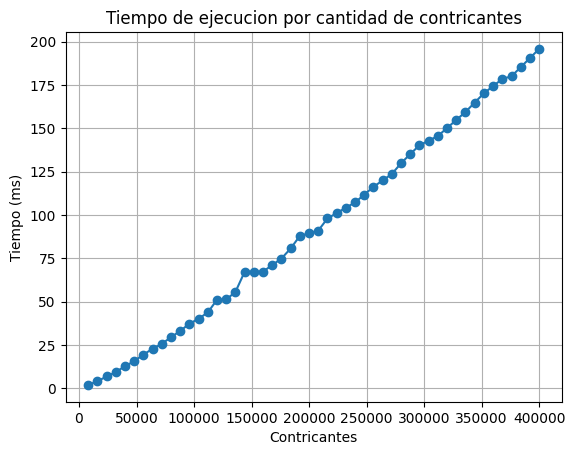

In [4]:
contricantes = [analisis[0] for analisis in resultado]
tiempos = [analisis[1] for analisis in resultado]

plt.plot(contricantes, tiempos, label= "Tiempo segun cantidad de contricantes",  marker='o', linestyle='-')
plt.xlabel('Contricantes')
plt.ylabel('Tiempo (ms)')
plt.title('Tiempo de ejecucion por cantidad de contricantes')
plt.grid(True)

plt.show()

In [5]:
for i in range(1, len(resultado) -1):
    medida_anterior = resultado[i-1][1]
    medida = resultado[i][1]
    medida_siguiente = resultado[i+1][1]

    medida_aproximada = (medida_anterior + medida_siguiente)/2
    resultado[i] = (resultado[i][0], round(medida_aproximada, 2))
    print(f"Suavizando resultado {resultado[i][0]}, {medida} a {medida_aproximada}")
print(resultado)

Suavizando resultado 16000, 4.09 a 4.415
Suavizando resultado 24000, 6.85 a 6.895
Suavizando resultado 32000, 9.37 a 9.85
Suavizando resultado 40000, 12.81 a 12.75
Suavizando resultado 48000, 15.65 a 16.130000000000003
Suavizando resultado 56000, 19.51 a 19.47
Suavizando resultado 64000, 22.81 a 22.585
Suavizando resultado 72000, 25.7 a 26.045
Suavizando resultado 80000, 29.5 a 29.585
Suavizando resultado 88000, 33.12 a 33.45
Suavizando resultado 96000, 37.31 a 36.805
Suavizando resultado 104000, 40.16 a 40.315
Suavizando resultado 112000, 43.83 a 45.725
Suavizando resultado 120000, 51.14 a 48.51
Suavizando resultado 128000, 51.29 a 52.08
Suavizando resultado 136000, 55.65 a 59.65
Suavizando resultado 144000, 67.22 a 63.474999999999994
Suavizando resultado 152000, 67.3 a 65.425
Suavizando resultado 160000, 67.38 a 68.275
Suavizando resultado 168000, 71.13 a 71.58500000000001
Suavizando resultado 176000, 74.89 a 76.15
Suavizando resultado 184000, 80.71 a 82.045
Suavizando resultado 1920

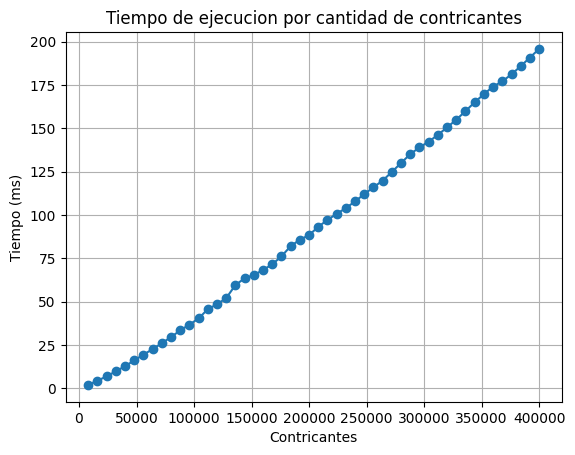

In [6]:
contricantes = [analisis[0] for analisis in resultado]
tiempos = [analisis[1] for analisis in resultado]

plt.plot(contricantes, tiempos, label= "Tiempo segun cantidad de contricantes",  marker='o', linestyle='-')
plt.xlabel('Contricantes')
plt.ylabel('Tiempo (ms)')
plt.title('Tiempo de ejecucion por cantidad de contricantes')
plt.grid(True)

plt.show()